In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

100% [......................................................] 1423529 / 1423529
Saved under housing (1).csv


In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.fillna(0,inplace=True)

In [11]:
df['rooms_per_household']= df['total_rooms'] / df['households']

In [12]:
df['bedrooms_per_room']= df['total_bedrooms'] / df['total_rooms']

In [13]:
df['population_per_household']= df['population'] / df['households']

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Most frequent value in ocean_proximity

In [24]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [23]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## CORRELATION HEATMAP

<AxesSubplot:>

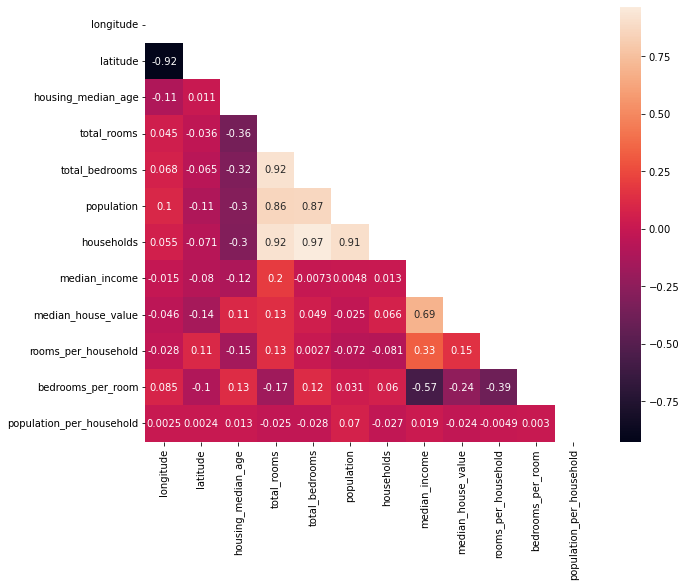

In [31]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,mask=mask,annot=True)

In [37]:
mean = df['median_house_value'].mean()

In [58]:
df['median_house_value']>mean

0         True
1         True
2         True
3         True
4         True
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_house_value, Length: 20640, dtype: bool

In [60]:
df['above_average']=np.where(df['median_house_value']>mean,1,0)

In [65]:
df['median_house_value']=df['above_average']

In [66]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1,NEAR BAY,6.281853,0.172096,2.181467,1


## SPLITTING AND MUTUAL INFO SCORE

In [62]:
from sklearn.model_selection import train_test_split

In [67]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)

In [68]:
len(df_full_train),len(df_val),len(df_test)

(16512, 4128, 4128)

In [69]:
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values


In [70]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [97]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [98]:
from sklearn.metrics import mutual_info_score

In [99]:
round(mutual_info_score(df_full_train.median_house_value,df_full_train.ocean_proximity),2)

0.1

# LOGISTIC REGRESSION

In [74]:
from sklearn.feature_extraction import DictVectorizer

In [100]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [79]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [102]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [103]:
y_pred = model.predict_proba(X_val)[:, 1]

In [104]:
value_decision = (y_pred >= 0.5)

In [105]:
round((y_val == value_decision).mean(),2)

0.84

In [106]:
from sklearn.metrics import accuracy_score

In [108]:
y_predd = model.predict(X_val)

In [109]:
score = accuracy_score(y_val,y_predd)
round(score,2)

0.84

In [94]:
dfa = df_train.drop(columns=['total_rooms'])

In [110]:
dfv = df_val.drop(columns=['total_rooms'])

In [113]:
dv1 = DictVectorizer(sparse=False)

train_dict = dfa.to_dict(orient='records')
X_train = dv1.fit_transform(train_dict)

val_dict = dfv.to_dict(orient='records')
X_val = dv1.transform(val_dict)

In [114]:
model_2 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [115]:
model_2.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [117]:
y_pred = model_2.predict(X_val)

In [125]:
score_2 = accuracy_score(y_val,y_pred)
round(score_2,2)

0.84

In [158]:
dfr = df_train.drop(columns=['total_bedrooms'])

In [159]:
dft = df_val.drop(columns=['total_bedrooms'])

In [160]:
dv1 = DictVectorizer(sparse=False)

train_dict = dfr.to_dict(orient='records')
X_train = dv1.fit_transform(train_dict)

val_dict = dft.to_dict(orient='records')
X_val = dv1.transform(val_dict)

In [161]:
model_3 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [162]:
model_3.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [163]:
y_pred = model_3.predict(X_val)

In [164]:
score_3 = accuracy_score(y_val,y_pred)
round(score_3,2)

0.84

In [135]:
dfc = df_train.drop(columns=['population'])

In [136]:
dfk = df_val.drop(columns=['population'])

In [137]:
dv1 = DictVectorizer(sparse=False)

train_dict = dfc.to_dict(orient='records')
X_train = dv1.fit_transform(train_dict)

val_dict = dfk.to_dict(orient='records')
X_val = dv1.transform(val_dict)

In [138]:
model_4 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [139]:
model_4.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [140]:
y_pred = model_4.predict(X_val)

In [141]:
score_4 = accuracy_score(y_val,y_pred)
round(score_4,2)

0.83

In [144]:
dff = df_train.drop(columns=['households'])

In [145]:
dfg = df_val.drop(columns=['households'])

In [146]:
dv1 = DictVectorizer(sparse=False)

train_dict = dff.to_dict(orient='records')
X_train = dv1.fit_transform(train_dict)

val_dict = dfg.to_dict(orient='records')
X_val = dv1.transform(val_dict)

In [147]:
model_5 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [148]:
model_5.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [149]:
y_pred = model_5.predict(X_val)

In [150]:
score_5 = accuracy_score(y_val,y_pred)
round(score_5,2)

0.83

In [165]:
a = score - score_2,
b = score - score_3,
c = score - score_4,
d = score - score_5

In [166]:
e = [a,b,c,d]

In [167]:
e

[(-0.0031492248062015005,),
 (-0.0031492248062015005,),
 (0.008963178294573715,),
 0.0016957364341085857]

In [168]:
from sklearn.linear_model import Ridge

In [169]:
df_full_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,0,NEAR OCEAN,5.017657,0.200576,3.691814,0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,1,NEAR OCEAN,4.473545,0.232703,1.738095,1
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,0,NEAR OCEAN,5.645833,0.174486,2.723214,0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,0,NEAR OCEAN,4.002817,0.258269,3.994366,0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,0,INLAND,6.268421,0.180940,2.300000,0


In [170]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)

In [171]:
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

In [172]:
y_train

array([1, 1, 0, ..., 1, 0, 0])